In [ ]:
#Importing all the Libraries needed
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io

fb=pd.read_csv('TCS.NS.csv',parse_dates=True,index_col='Date')
fb=fb.drop(columns=['Adj Close','Open','Low','High','Volume'])

Saving TCS.NS.csv to TCS.NS (1).csv


In [ ]:
fin =fb
fin

,Close
Date,
2008-01-01,263.638000
2008-01-02,262.500000
2008-01-03,252.761993
2008-01-04,251.300003
2008-01-07,243.899994
...,...
2020-10-26,2688.199951
2020-10-27,2630.149902
2020-10-28,2622.199951


In [ ]:
fb=fb.asfreq(freq='D',method='bfill')
fin = fin.asfreq(freq='D',method='bfill')
fin

,Close
Date,
2008-01-01,263.638000
2008-01-02,262.500000
2008-01-03,252.761993
2008-01-04,251.300003
2008-01-05,243.899994
...,...
2020-10-26,2688.199951
2020-10-27,2630.149902
2020-10-28,2622.199951


In [ ]:
fb

,Close
Date,
2008-01-01,263.638000
2008-01-02,262.500000
2008-01-03,252.761993
2008-01-04,251.300003
2008-01-05,243.899994
...,...
2020-10-26,2688.199951
2020-10-27,2630.149902
2020-10-28,2622.199951



#Forecasting Procedure:
   
   1.)Choose a Model
   2.)Split the Data into Training and Test Data
   3.)Fit the Model on Training Data
   4.)Evaluate the Model on Test Data
   5.)Re-Fit the Model on Entire Data
   6.)Forecast for Future Data
   
   

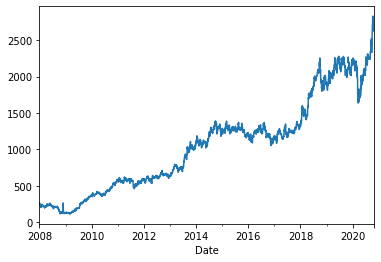

In [ ]:
fb['Close'].plot()

In [ ]:
fb=fb.fillna(method='ffill')
fin = fin.fillna(method='ffill')

In [ ]:
fb.isnull().values.any()
fin.isnull().values.any()

False

In [ ]:
breakup=seasonal_decompose(fb['Close'],model='additive')

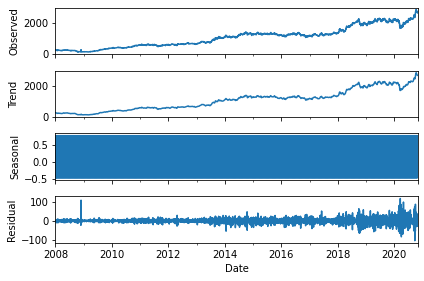

In [ ]:
breakup.plot();

In [ ]:
len(fb)

4687

In [ ]:
train_fb=fb.iloc[:-468]
test_fb=fb.iloc[-468:]

In [ ]:
train_fb.tail()

,Close
Date,
2019-07-16,2106.000000
2019-07-17,2117.250000
2019-07-18,2065.949951
2019-07-19,2076.949951
2019-07-20,2109.899902


In [ ]:
test_fb.head()

,Close
Date,
2019-07-21,2109.899902
2019-07-22,2109.899902
2019-07-23,2112.449951
2019-07-24,2096.800049
2019-07-25,2127.899902


# Exponential Smoothing


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
test_fb_model=ExponentialSmoothing(train_fb['Close'],trend='add',seasonal='mul',seasonal_periods=365).fit()

In [ ]:
test_fb_predictions=test_fb_model.forecast(468)

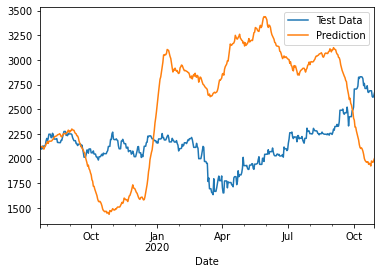

In [ ]:

test_fb['Close'].plot(legend=True,label='Test Data')
test_fb_predictions.plot(legend=True,label='Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
std=fb['Close'].std()
rmse=np.sqrt(mean_squared_error(test_fb['Close'],test_fb_predictions))
rmse,std

(775.387869248748, 639.7263506120339)

In [ ]:
fb_ES_model=ExponentialSmoothing(fb['Close'],trend='add',seasonal='mul',seasonal_periods=90).fit()
fb_ES_Predictions=fb_ES_model.forecast(240)


In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test_fb['Close'], test_fb_predictions) 

664.9552165383474

In [ ]:
mape = np.mean(np.abs((test_fb['Close'] - test_fb_predictions)/test_fb['Close']))*100
mape

32.175611908300176

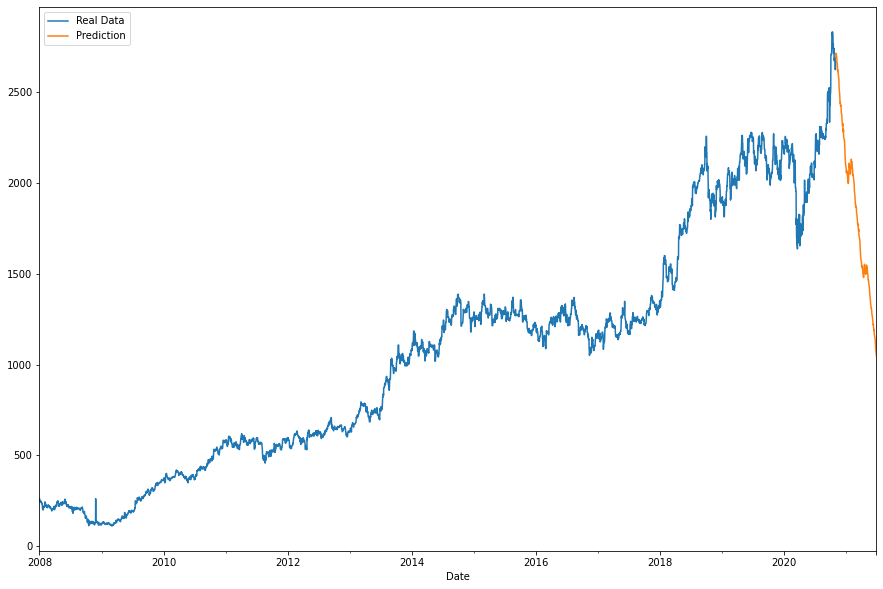

In [ ]:
fb['Close'].plot(legend=True,label='Real Data',figsize=(15,10))
fb_ES_Predictions.plot(legend=True,label='Prediction')

# ARIMA


In [ ]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
fin

,Close
Date,
2008-01-01,263.638000
2008-01-02,262.500000
2008-01-03,252.761993
2008-01-04,251.300003
2008-01-05,243.899994
...,...
2020-10-26,2688.199951
2020-10-27,2630.149902
2020-10-28,2622.199951


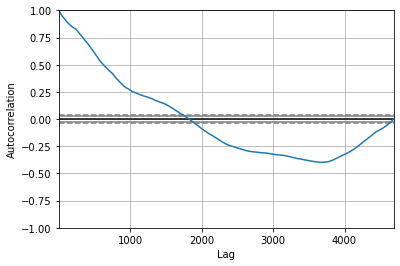

In [ ]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(fin)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                 4685
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -19934.482
Method:                       css-mle   S.D. of innovations             17.033
Date:                Wed, 02 Dec 2020   AIC                          39876.965
Time:                        22:10:40   BIC                          39902.773
Sample:                    01-03-2008   HQIC                         39886.040
                         - 10-30-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0002      0.000      1.265      0.206      -0.000       0.001
ar.L1.D2.Close    -0.0344      0.015     -2.354      0.019      -0.063      -0.006
ma.L1.D2.Close    -0.9999      0.001

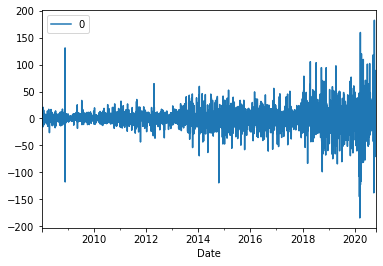

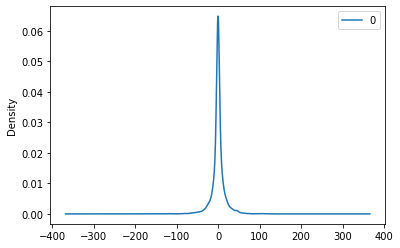

                 0
count  4685.000000
mean      0.033336
std      17.038462
min    -184.760122
25%      -3.187988
50%      -0.447342
75%       3.520079
max     182.373065


In [ ]:
from pandas import DataFrame
model = ARIMA(fin, order=(1,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [ ]:
pyplot

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
import math
from sklearn.metrics import mean_squared_error
X = fin.values
size = int(len(X) * 0.66)
train, test = X[0:1000], X[4501:4685]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(0,2,0))
	model_fit = model.fit(disp=1)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))



predicted=463.801128, expected=1859.050049
predicted=3255.697896, expected=1905.650024
predicted=1952.297737, expected=2014.449951
predicted=2123.359706, expected=1930.449951
predicted=1846.367254, expected=1930.449951
predicted=1930.451086, expected=1930.449951
predicted=1930.451084, expected=1930.449951
predicted=1930.451083, expected=1932.750000
predicted=1935.053467, expected=1903.599976
predicted=1874.422135, expected=1891.650024
predicted=1879.689346, expected=1893.400024
predicted=1895.152888, expected=1935.300049
predicted=1977.242686, expected=1935.300049
predicted=1935.301175, expected=1935.300049
predicted=1935.301174, expected=1949.500000
predicted=1963.715092, expected=1949.650024
predicted=1949.801318, expected=1902.349976
predicted=1855.004448, expected=1892.900024
predicted=1883.441891, expected=1945.599976
predicted=1998.352866, expected=1945.599976
predicted=1945.601095, expected=1945.599976
predicted=1945.601093, expected=1948.650024
predicted=1951.704178, expected=1

In [ ]:
error = mean_squared_error(test, predictions)
rmse = math.sqrt(error)
print('Test RMSE: %.3f' % rmse)
# plot

Test RMSE: 152.129


In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test, predictions) 

48.526285874337695

In [ ]:
mape = np.mean(np.abs((test - predictions)/test))*100
mape

2.2779060924231542

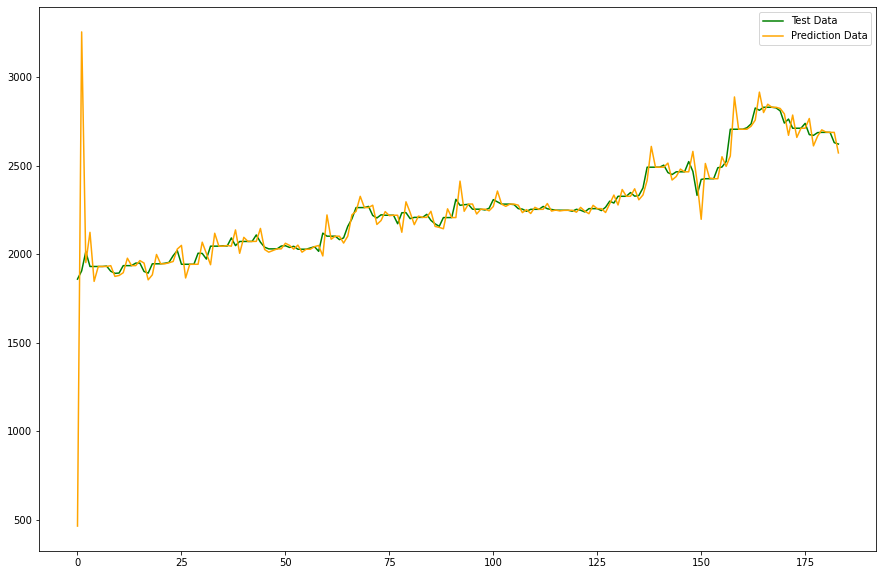

In [ ]:
plt.figure(figsize=(15,10))

pyplot.plot(test, color = 'green')
pyplot.plot(predictions, color='orange')
pyplot.legend(['Test Data','Prediction Data'])
pyplot.show()

## NEW ARIMA


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()